In [55]:
# pip install nilearn within 
import nilearn as nib

import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import nibabel as nib
import seaborn as sns
import numpy as np
import glob
import random 
import os
%matplotlib inline


from nilearn.plotting import plot_surf, plot_surf_contours

# nilearn import (later in the code)
import os
os.chdir("/scratch/a/arisvoin/iismail")

current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: /gpfs/fs0/scratch/a/arisvoin/iismail


In [11]:
#Convert vectorized into sorted matrix.
def visvec(cwin,netlabels):
    
    #Format.
    corrmat = pd.DataFrame(cwin)
    
    #Add a column for the labels.
    rowlabelled = pd.concat([pd.Series(netlabels),pd.DataFrame(corrmat)],axis=1)
    
    #Add a row for the labels.
    colnetlabels = [0] + netlabels
    rowlabelled.loc[-1] = colnetlabels
    rowlabelled.index = rowlabelled.index + 1
    collabelled = rowlabelled.sort_index()
    collabelled.columns = range(361)
    
    #Adds axes labels to enable reference.
    collabelled = collabelled.rename_axis('Index')
    collabelled = collabelled.rename_axis('Columns',axis='columns')
    
    #Sort the rows and columns.w
    rowsort = collabelled.sort_values(by=[0,'Index'],axis=0)
    colsort = rowsort.sort_values(by=[0,'Columns'],axis=1)
    
    #Reset indices. Save the matrix to list.
    reformatted = colsort.reset_index(drop=True)
    reformatted.columns = range(reformatted.shape[1])
    return reformatted


#Read in network labels and convert them to integers.
with open('colenetlabels.txt') as f:
    netlabels = [label.rstrip() for label in f] 
netlabels = list(map(int,netlabels))
print(netlabels)

[1, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 6, 2, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 8, 4, 6, 10, 10, 7, 9, 9, 9, 9, 9, 9, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4, 5, 3, 2, 2, 5, 3, 3, 3, 3, 3, 3, 4, 7, 4, 4, 9, 7, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 7, 6, 9, 7, 4, 6, 7, 7, 4, 7, 4, 7, 4, 9, 9, 7, 9, 7, 7, 7, 9, 5, 5, 7, 7, 4, 3, 3, 3, 8, 3, 4, 4, 8, 4, 4, 12, 7, 12, 4, 4, 3, 5, 5, 9, 9, 9, 1, 11, 6, 8, 6, 9, 5, 9, 6, 9, 9, 9, 7, 9, 11, 5, 5, 2, 6, 10, 10, 1, 5, 7, 7, 5, 4, 4, 7, 9, 9, 2, 2, 2, 9, 2, 2, 2, 2, 2, 9, 7, 2, 9, 9, 12, 4, 3, 4, 7, 7, 6, 8, 8, 8, 9, 7, 4, 4, 4, 1, 2, 2, 2, 2, 2, 2, 3, 3, 4, 5, 6, 2, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 8, 6, 6, 10, 6, 7, 9, 9, 9, 9, 9, 9, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4, 5, 3, 2, 2, 5, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 9, 9, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 6, 6, 9, 7, 4, 6, 7, 6, 7, 7, 4, 7, 4, 9, 9, 7, 9, 7, 7, 9, 9, 5, 5, 7, 7, 4, 3, 3, 3, 8, 8, 4, 4, 8, 4, 4, 12, 7, 12, 4, 4, 3, 5, 5, 9, 9, 9, 1, 11, 6, 8, 6, 9, 5, 6, 6, 9, 9, 9, 7, 9, 11, 5, 5, 2, 6, 10, 10, 1, 5, 7, 7, 5, 4, 4,

In [23]:
# RETRIVEING FILES''
files = sorted(glob.glob("/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/861456/demean_rfMRI*.csv", recursive = True))
print(files)


['/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/861456/demean_rfMRI_REST1_LR_Atlas_MSMAll_hp2000_clean.dtseries.nii_meants.csv', '/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/861456/demean_rfMRI_REST1_RL_Atlas_MSMAll_hp2000_clean.dtseries.nii_meants.csv', '/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/861456/demean_rfMRI_REST2_LR_Atlas_MSMAll_hp2000_clean.dtseries.nii_meants.csv', '/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/861456/demean_rfMRI_REST2_RL_Atlas_MSMAll_hp2000_clean.dtseries.nii_meants.csv']


In [24]:
#the for loop creating the connectivity matrices
list_of_matrices=[]
for i in files:
    
   # ptseries_glasser392_file = i
  #  glasser_ptseries_nib = nib.load(ptseries_glasser392_file)
    #print(glasser_ptseries_nib.get_fdata().shape) -> testing
    
    ## creating the correlation matrix using pandas
  #  ts_data = glasser_ptseries_nib.get_fdata()
 #   ts_df = pd.DataFrame(glasser_ptseries_nib.get_fdata(), columns=schaefer400_parcels)
    ts_df=pd.read_csv(i,header=None)
    #glasser392_corZ_pd = np.arctanh(ts_df.T.corr())


    ts_cor_df = ts_df.T.corr()  ## you can just call corr() on the pandas dataframe to get a correlation matrix
    ts_corZ_df = np.arctanh(ts_cor_df) ## the Fisher's r-to-z transform - we usually do this before stats
    #print(ts_corZ_df)
    reformatted = visvec(ts_corZ_df,netlabels)
  #  print(reformatted.iloc[1:,1:].values)
    list_of_matrices.append(reformatted.iloc[1:,1:].values)

/gpfs/fs0/scratch/a/arisvoin/iismail/pythonimports/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in arctanh


In [ ]:
# if len(list_of_matrices) > 0 and all(isinstance(matrix, (np.ndarray, list)) for matrix in list_of_matrices):
# matrices_array = np.array(list_of_matrices)

# print(f"Shape of matrices_array: {matrices_array.shape}")

# averaged_array = matrices_array.mean(axis=0)

# print(f"Shape of averaged_array: {averaged_array.shape}")
# else:
# print("list_of_matrices is empty or contains invalid elements")

In [87]:
matrices_array = np.array(list_of_matrices) #creates an array that stores all the matrices
print(matrices_array)

# Create the named matrix
matrix_861456 = averaged_array
averaged_array = np.array(matrices_array).mean(axis=0) #averages the matrices here
if len(averaged_array.shape) != 2:
    averaged_array = np.atleast_2d(averaged_array)
print(averaged_array)

[[[        inf  0.27260648  0.58566824 ... -0.01916133  0.01173993
    0.05848568]
  [ 0.27260648         inf  0.31296816 ... -0.02845017 -0.03161621
   -0.00585979]
  [ 0.58566824  0.31296816         inf ...  0.0274748   0.03354293
    0.0988858 ]
  ...
  [-0.01916133 -0.02845017  0.0274748  ...         inf  0.33208939
    0.01864261]
  [ 0.01173993 -0.03161621  0.03354293 ...  0.33208939         inf
    0.05389418]
  [ 0.05848568 -0.00585979  0.0988858  ...  0.01864261  0.05389418
           inf]]

 [[        inf  0.25215646  0.61089287 ...  0.00623557  0.07687897
    0.0816169 ]
  [ 0.25215646         inf  0.2585168  ... -0.01017765 -0.01679425
   -0.02959842]
  [ 0.61089287  0.2585168          inf ... -0.001402    0.08927343
    0.08371603]
  ...
  [ 0.00623557 -0.01017765 -0.001402   ...         inf  0.15352423
    0.05212617]
  [ 0.07687897 -0.01679425  0.08927343 ...  0.15352423         inf
   -0.03407881]
  [ 0.0816169  -0.02959842  0.08371603 ...  0.05212617 -0.03407881
      

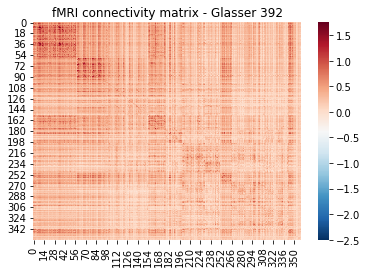

In [26]:

plt1 = sns.heatmap(averaged_array, vmin=-2.5, vmax=1.75, cmap="RdBu_r")
plt1.set_title("fMRI connectivity matrix - Glasser 392")
plt.show()


/gpfs/fs0/scratch/a/arisvoin/iismail/pythonimports/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in arctanh


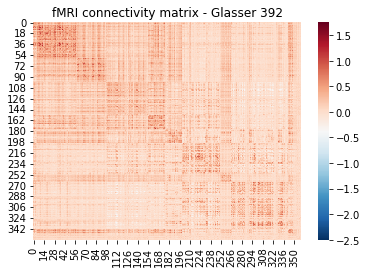

In [32]:
# RETRIVEING FILES''
files = sorted(glob.glob("/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/105014/demean_rfMRI*.csv", recursive = True))
#print(files)

#the for loop creating the connectivity matrices
list_of_matrices=[]
for i in files:
    
   # ptseries_glasser392_file = i
  #  glasser_ptseries_nib = nib.load(ptseries_glasser392_file)
    #print(glasser_ptseries_nib.get_fdata().shape) -> testing
    
    ## creating the correlation matrix using pandas
  #  ts_data = glasser_ptseries_nib.get_fdata()
 #   ts_df = pd.DataFrame(glasser_ptseries_nib.get_fdata(), columns=schaefer400_parcels)
    ts_df=pd.read_csv(i,header=None)
    #glasser392_corZ_pd = np.arctanh(ts_df.T.corr())


    ts_cor_df = ts_df.T.corr()  ## you can just call corr() on the pandas dataframe to get a correlation matrix
    ts_corZ_df = np.arctanh(ts_cor_df) ## the Fisher's r-to-z transform - we usually do this before stats
    #print(ts_corZ_df)
    reformatted = visvec(ts_corZ_df,netlabels)
  #  print(reformatted.iloc[1:,1:].values)
    list_of_matrices.append(reformatted.iloc[1:,1:].values)

matrices_array = np.array(list_of_matrices) #creates an array that stores all the matrices
#print(matrices_array)
averaged_array = np.array(matrices_array).mean(axis=0) #averages the matrices here
if len(averaged_array.shape) != 2:
    averaged_array = np.atleast_2d(averaged_array)
#print(averaged_array)

plt1 = sns.heatmap(averaged_array, vmin=-2.5, vmax=1.75, cmap="RdBu_r")
plt1.set_title("fMRI connectivity matrix - Glasser 392")
plt.show()


/gpfs/fs0/scratch/a/arisvoin/iismail/pythonimports/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in arctanh


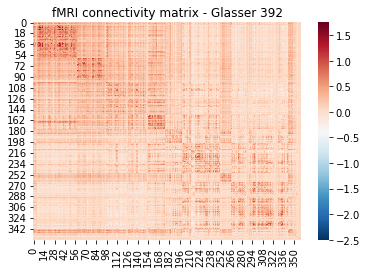

In [82]:
# RETRIVEING FILES''
files = sorted(glob.glob("/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/339847/demean_rfMRI*.csv", recursive = True))
#print(files)

#the for loop creating the connectivity matrices
list_of_matrices=[]
for i in files:
    
   # ptseries_glasser392_file = i
  #  glasser_ptseries_nib = nib.load(ptseries_glasser392_file)
    #print(glasser_ptseries_nib.get_fdata().shape) -> testing
    
    ## creating the correlation matrix using pandas
  #  ts_data = glasser_ptseries_nib.get_fdata()
 #   ts_df = pd.DataFrame(glasser_ptseries_nib.get_fdata(), columns=schaefer400_parcels)
    ts_df=pd.read_csv(i,header=None)
    #glasser392_corZ_pd = np.arctanh(ts_df.T.corr())


    ts_cor_df = ts_df.T.corr()  ## you can just call corr() on the pandas dataframe to get a correlation matrix
    ts_corZ_df = np.arctanh(ts_cor_df) ## the Fisher's r-to-z transform - we usually do this before stats
    #print(ts_corZ_df)
    reformatted = visvec(ts_corZ_df,netlabels)
  #  print(reformatted.iloc[1:,1:].values)
    list_of_matrices.append(reformatted.iloc[1:,1:].values)

matrices_array = np.array(list_of_matrices) #creates an array that stores all the matrices
#print(matrices_array)

# Create the named matrix
matrix_339847 = averaged_array

averaged_array = np.array(matrices_array).mean(axis=0) #averages the matrices here
if len(averaged_array.shape) != 2:
    averaged_array = np.atleast_2d(averaged_array)
#print(averaged_array)

plt1 = sns.heatmap(averaged_array, vmin=-2.5, vmax=1.75, cmap="RdBu_r")
plt1.set_title("fMRI connectivity matrix - Glasser 392")
plt.show()

/gpfs/fs0/scratch/a/arisvoin/iismail/pythonimports/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in arctanh


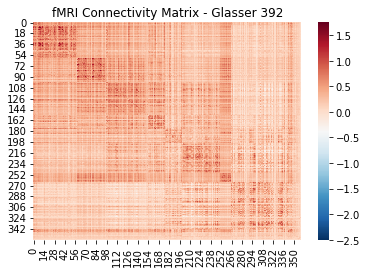

In [77]:
# RETRIVEING FILES''
files = sorted(glob.glob("/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/110411/demean_rfMRI*.csv", recursive = True))
#print(files)

# Initialize a list to store matrices for each file
list_of_matrices = []

# Loop through each file
for i in files:
    # Read CSV file
    ts_df = pd.read_csv(i, header=None)
    
    # Compute correlation matrix
    ts_cor_df = ts_df.T.corr()
    
    # Fisher's r-to-z transform
    ts_corZ_df = np.arctanh(ts_cor_df)
    
    # Append the reformatted matrix to the list
    list_of_matrices.append(visvec(ts_corZ_df, netlabels).iloc[1:, 1:].values)

# Combine matrices into a single array
matrices_array = np.array(list_of_matrices)

# Average matrices across files
averaged_array = np.mean(matrices_array, axis=0)

# Create the named matrix
matrix_110411 = averaged_array

# Plot the connectivity matrix
plt1 = sns.heatmap(matrix_110411, vmin=-2.5, vmax=1.75, cmap="RdBu_r")
plt1.set_title("fMRI Connectivity Matrix - Glasser 392")
plt.show()

['/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/110411/demean_rfMRI_REST1_LR_Atlas_MSMAll_hp2000_clean.dtseries.nii_meants.csv', '/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/110411/demean_rfMRI_REST1_RL_Atlas_MSMAll_hp2000_clean.dtseries.nii_meants.csv', '/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/110411/demean_rfMRI_REST2_LR_Atlas_MSMAll_hp2000_clean.dtseries.nii_meants.csv', '/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/110411/demean_rfMRI_REST2_RL_Atlas_MSMAll_hp2000_clean.dtseries.nii_meants.csv']


/gpfs/fs0/scratch/a/arisvoin/iismail/pythonimports/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in arctanh


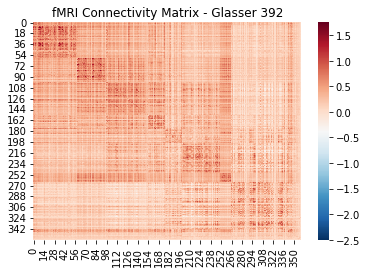

In [80]:
# RETRIVEING FILES''
files = sorted(glob.glob("/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/110411/demean_rfMRI*.csv", recursive = True))
print(files)

# Initialize a list to store matrices for each file
list_of_matrices = []

# Loop through each file
for i in files:
    # Read CSV file
    ts_df = pd.read_csv(i, header=None)
    
    # Compute correlation matrix
    ts_cor_df = ts_df.T.corr()
    
    # Fisher's r-to-z transform
    ts_corZ_df = np.arctanh(ts_cor_df)
    
    # Append the reformatted matrix to the list
    list_of_matrices.append(visvec(ts_corZ_df, netlabels).iloc[1:, 1:].values)

# Combine matrices into a single array
matrices_array = np.array(list_of_matrices)

# Average matrices across files
averaged_array = np.mean(matrices_array, axis=0)

# Create the named matrix
matrix_110411 = averaged_array

# Plot the connectivity matrix
plt1 = sns.heatmap(matrix_110411, vmin=-2.5, vmax=1.75, cmap="RdBu_r")
plt1.set_title("fMRI Connectivity Matrix - Glasser 392")
plt.show()

In [58]:
''''

sample_size = 5
file_path = "/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/"

# List all directories (patients)
patients = [os.path.join(file_path, patient) for patient in os.listdir(file_path) if os.path.isdir(os.path.join(file_path, patient))]

if len(patients) >= sample_size:
    random_sample = random.sample(patients, sample_size)
    print("Randomly selected patients:")
    for patient in random_sample:
        print(patient)
else:
    print("Error: There are not enough patients to perform sampling.")


Randomly selected patients:
/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/861456
/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/555651
/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/130922
/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/102614
/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/929464


In [ ]:
Randomly selected patients:
/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/861456
/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/555651
/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/130922
/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/102614
/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/929464

In [60]:
file_path = "/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/"

if len(patients) >= sample_size:
    random_sample = random.sample(patients, sample_size)
    print("Randomly selected patients:")
    for patient_dir in random_sample:
        print(f"Patient Directory: {patient_dir}")
        csv_files = [file for file in os.listdir(patient_dir) if file.endswith('.csv')]
        if csv_files:
            print("CSV files:")
            for csv_file in csv_files:
                print(f"- {csv_file}")
        else:
            print("No CSV files found in this patient directory.")
else:
    print("Error: There are not enough patients to perform sampling.")

Randomly selected patients:
Patient Directory: /scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/759869
CSV files:
- demean_rfMRI_REST2_RL_Atlas_MSMAll_hp2000_clean.dtseries.nii_meants.csv
- demean_postproc_rfMRI_REST2_LR_Atlas_MSMAll_hp2000_clean.dtseries.nii_meants.csv
- demean_postproc_rfMRI_REST2_RL_Atlas_MSMAll_hp2000_clean.dtseries.nii_meants.csv
- demean_postproc_rfMRI_REST1_LR_Atlas_MSMAll_hp2000_clean.dtseries.nii_meants.csv
- demean_postproc_rfMRI_REST1_RL_Atlas_MSMAll_hp2000_clean.dtseries.nii_meants.csv
- demean_rfMRI_REST1_LR_Atlas_MSMAll_hp2000_clean.dtseries.nii_meants.csv
- demean_rfMRI_REST2_LR_Atlas_MSMAll_hp2000_clean.dtseries.nii_meants.csv
- demean_rfMRI_REST1_RL_Atlas_MSMAll_hp2000_clean.dtseries.nii_meants.csv
Patient Directory: /scratch/a/arisvoin/iismail/HCP_TimeSeries_Data/r_meants/175136
CSV files:
- demean_rfMRI_REST2_RL_Atlas_MSMAll_hp2000_clean.dtseries.nii_meants.csv
- demean_postproc_rfMRI_REST2_LR_Atlas_MSMAll_hp2000_clean.dtseries.nii_meants.csv

In [81]:
csv_file_path = "/scratch/a/arisvoin/iismail/behaviouraldataset_iismail_6_11_2024_10_58_21.csv"
data = pd.read_csv(csv_file_path)

# Randomly select patient data
sample_size = 5
random_sample = data.sample(n=sample_size)

# Extract Age and Gender information for each randomly selected patient
for index, row in random_sample.iterrows():
    patient_age = row['Age']
    patient_gender = row['Gender']
    print(f"Randomly selected patient - Age: {patient_age}, Gender: {patient_gender}")


Randomly selected patient - Age: 22-25, Gender: F
Randomly selected patient - Age: 31-35, Gender: M
Randomly selected patient - Age: 22-25, Gender: M
Randomly selected patient - Age: 31-35, Gender: M
Randomly selected patient - Age: 26-30, Gender: F


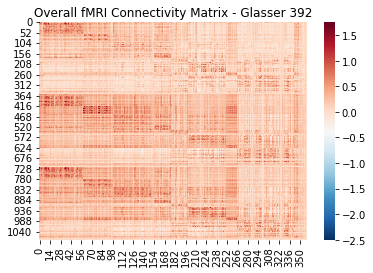

In [90]:
#giant matrix 

# Define the list of patients with their respective matrices
patients_and_matrices = [
    ("861456", matrix_861456),  # Replace matrix_for_861456 with the matrix you have for patient 861456
    ("339847", matrix_339847),  # Replace matrix_for_339847 with the matrix you have for patient 339847 
    ("110411", matrix_110411),  # Replace matrix_for_110411 with the matrix you have for patient 110411


# Initialize a list to store all matrices
all_matrices = []

# Loop through each patient and their matrix
for patient_id, matrix in patients_and_matrices:
    # Append the matrix to the list
    all_matrices.append(matrix)

# Combine all matrices into a single array
combined_matrix = np.concatenate(all_matrices, axis=0)

# Plot the overall connectivity matrix
plt1 = sns.heatmap(combined_matrix, vmin=-2.5, vmax=1.75, cmap="RdBu_r")
plt1.set_title("Overall fMRI Connectivity Matrix - Glasser 392")
plt.show()

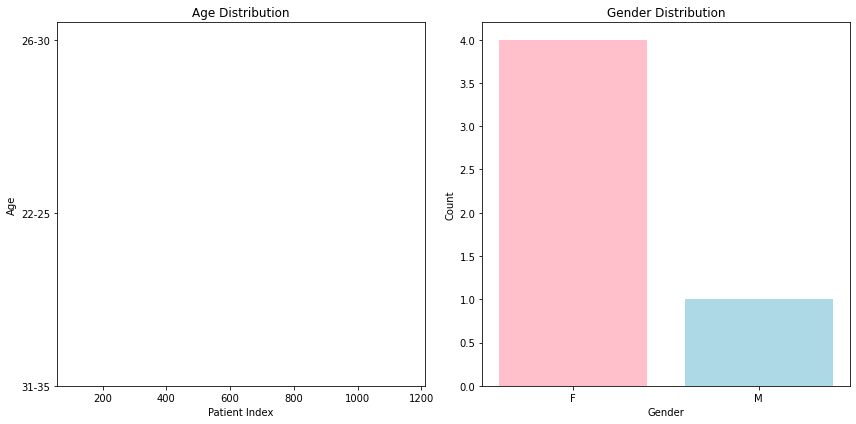

In [91]:

# Randomly select patient data
sample_size = 5
random_sample = data.sample(n=sample_size)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Demographic graph for Age
axs[0].bar(random_sample.index, random_sample['Age'], color='skyblue')
axs[0].set_title('Age Distribution')
axs[0].set_xlabel('Patient Index')
axs[0].set_ylabel('Age')

# Demographic graph for Gender
gender_counts = random_sample['Gender'].value_counts()
axs[1].bar(gender_counts.index, gender_counts.values, color=['pink', 'lightblue'])
axs[1].set_title('Gender Distribution')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

DataError: No numeric types to aggregate

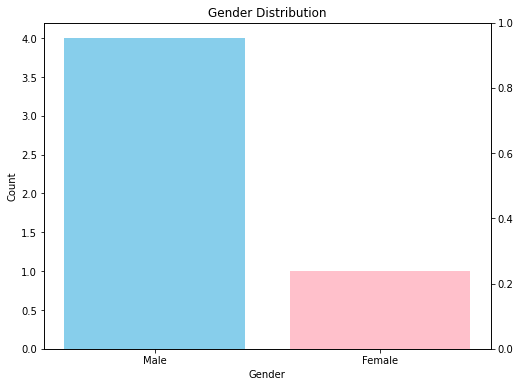

In [70]:
# Load the CSV file containing patient data
csv_file_path = "/scratch/a/arisvoin/iismail/behaviouraldataset_iismail_6_11_2024_10_58_21.csv"
data = pd.read_csv(csv_file_path)

# Randomly select patient data
sample_size = 5
random_sample = data.sample(n=sample_size)

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot Gender distribution
gender_counts = random_sample['Gender'].value_counts()
ax1.bar(['Male', 'Female'], gender_counts.values, color=['skyblue', 'pink'])
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title('Gender Distribution')

# Create a secondary y-axis for Age line plot
ax2 = ax1.twinx()
ax2.plot(['Male', 'Female'], random_sample.groupby('Gender')['Age'].mean(), color='green', marker='o', linestyle='-')
ax2.set_ylabel('Age', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add legend
ax1.legend(['Count'], loc='upper left')
ax2.legend(['Age'], loc='upper right')

plt.tight_layout()
plt.show()

In [72]:
subject_ids = [861456,105014, 110411, 339847, 578158]

# Iterate over each subject ID
for subject_id in subject_ids:
    # Filter data for the current subject ID
    subject_data = data[data['Subject'] == subject_id]

    # Check if data for the current subject ID is found
    if not subject_data.empty:
        # Access gender and age columns using correct capitalization
        gender = subject_data['Gender'].iloc[0]  # Note the capital 'G'
        age = subject_data['Age'].iloc[0]        # Note the capital 'A'
        print(f"Subject {subject_id}: Gender: {gender}, Age: {age}")
    else:
        print(f"Data not found for subject {subject_id}")

Subject 861456: Gender: F, Age: 31-35
Subject 105014: Gender: F, Age: 26-30
Subject 110411: Gender: M, Age: 31-35
Subject 339847: Gender: F, Age: 26-30
Subject 578158: Gender: M, Age: 26-30


In [112]:
patients = ['861456', '105014', '110411', '339847', '578158']
files_per_patient = {}

for patient in patients:
    files = sorted(glob.glob(f"/scratch/a/arisvoin/iismail/behaviouraldataset_iismail_6_11_2024_10_58_21.csv", recursive=True))
    files_per_patient[patient] = files

for patient, files in files_per_patient.items():
    print(f"Files for patient {patient}:")
    for file in files:
        print(file)

Files for patient 861456:
/scratch/a/arisvoin/iismail/behaviouraldataset_iismail_6_11_2024_10_58_21.csv
Files for patient 105014:
/scratch/a/arisvoin/iismail/behaviouraldataset_iismail_6_11_2024_10_58_21.csv
Files for patient 110411:
/scratch/a/arisvoin/iismail/behaviouraldataset_iismail_6_11_2024_10_58_21.csv
Files for patient 339847:
/scratch/a/arisvoin/iismail/behaviouraldataset_iismail_6_11_2024_10_58_21.csv
Files for patient 578158:
/scratch/a/arisvoin/iismail/behaviouraldataset_iismail_6_11_2024_10_58_21.csv


In [63]:
print(Age)

NameError: name 'Age' is not defined

In [ ]:

data=pd.read_csv("/scratch/a/arisvoin/iismail/behaviouraldataset_iismail_6_11_2024_10_58_21.csv")

print(data)
